In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

In [53]:
data = pd.concat([train_data,test_data],axis=0,sort=False)

In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [56]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


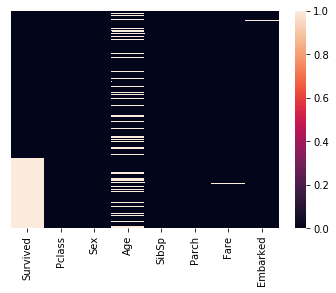

In [57]:
sns.heatmap(data.isnull(),yticklabels=False)

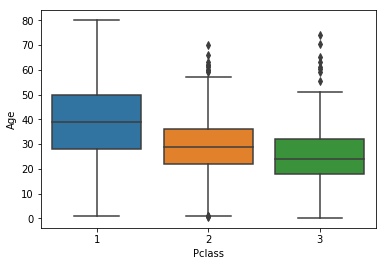

In [58]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [59]:
def ageValues(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass==3:
            return 23
        elif pclass==2:
            return 30
        else:
            return 40
    else:
        return age

In [60]:
data['Age'] = data[['Age','Pclass']].apply(ageValues,axis=1)

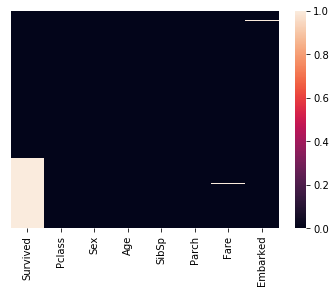

In [61]:
sns.heatmap(data.isnull(),yticklabels=False)

In [62]:
data.dropna(subset=['Embarked'],inplace=True)

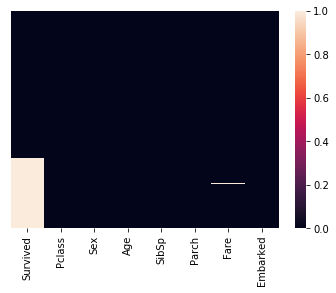

In [13]:
sns.heatmap(data.isnull(),yticklabels=False)

In [63]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S


In [64]:
new_pclass = pd.get_dummies(data['Pclass'],drop_first=True)
new_Sex = pd.get_dummies(data['Sex'],drop_first=True)
new_embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [65]:
data.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [66]:
data = pd.concat([data,new_Sex,new_embarked,new_pclass],axis=1)

In [67]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0.0,22.0,1,0,7.2500,1,0,1,0,1
1,1.0,38.0,1,0,71.2833,0,0,0,0,0
2,1.0,26.0,0,0,7.9250,0,0,1,0,1
3,1.0,35.0,1,0,53.1000,0,0,1,0,0
4,0.0,35.0,0,0,8.0500,1,0,1,0,1


In [68]:
data.shape

(1307, 10)

In [69]:
data[pd.isna(data['Survived'])].shape

(418, 10)

In [70]:
1307-418

889

In [100]:
unknown_data = data.iloc[889:1307,:].copy(deep=True)

In [72]:
known_data = data.iloc[0:889,:]

In [74]:
from sklearn.cross_validation import train_test_split

In [75]:
X = known_data.drop('Survived',axis=1)
y = known_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lrm = LogisticRegression()

In [78]:
lrm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
predictions = lrm.predict(X_test)

Solving Kaggle test data

In [101]:
unknown_data.drop('Survived',axis=1,inplace=True)

In [108]:
fare = unknown_data['Fare'].mean()
unknown_data.fillna(fare,inplace=True)

In [109]:
ans = lrm.predict(unknown_data)

In [116]:
answer = pd.DataFrame(ans,np.arange(892,1310),columns=['Survived'])
answer.to_csv('pred.csv')

Finished solving Kaggle

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[193  21]
 [ 42 100]]
             precision    recall  f1-score   support

        0.0       0.82      0.90      0.86       214
        1.0       0.83      0.70      0.76       142

avg / total       0.82      0.82      0.82       356



In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=50)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
predictions2 = rfc.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[176  38]
 [ 40 102]]
             precision    recall  f1-score   support

        0.0       0.81      0.82      0.82       214
        1.0       0.73      0.72      0.72       142

avg / total       0.78      0.78      0.78       356

